In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import sequence

Using TensorFlow backend.


In [2]:
a = pd.DataFrame(pd.read_csv("/Users/amin/Downloads/DCOILBRENTEU.csv"))

In [3]:
a = a[a.DCOILBRENTEU != '.']

In [15]:
#setting learning parameters
batch_size = 64
epochs = 20
time_steps = 20

In [5]:
def get_train_length(dataset, batch_size, test_percent):
    # substract test_percent to be excluded from training, reserved for testset
    length = len(dataset)
    length *= 1 - test_percent
    train_length_values = []
    for x in range(int(length) - 100,int(length)): 
        modulo=x%batch_size
        if (modulo == 0):
            train_length_values.append(x)
            print(x)
    return (max(train_length_values))

In [6]:
length = get_train_length(a, batch_size, 0.08)
print(length)

7232
7232


In [7]:
training_set = a.iloc[:,1:2]

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(np.float64(training_set))
training_set_scaled.shape

(7903, 1)

In [9]:
xtrain = []
ytrain = []
xtest = []
ytest = []
for i in range(time_steps,len(a)-1):
    if(i<length-1):
        xtrain.append(training_set_scaled[i-time_steps:i])
        ytrain.append(training_set_scaled[i-time_steps+1:i+1])
    else:
        xtest.append(training_set_scaled[i-time_steps:i])
        ytest.append(training_set_scaled[i-time_steps+1:i+1])

xtrain = np.array(xtrain)
ytrain = np.array(ytrain)
xtest = np.array(xtest[0:640])
ytest = np.array(ytest[0:640])


In [10]:
xtrain = xtrain[0:7168]

In [11]:
ytrain = ytrain[0:7168]

In [12]:
from keras.layers import LSTM,Dense,Input,Bidirectional
from keras.models import Model


In [13]:
input_layer = Input(batch_shape=(batch_size,time_steps,1))
lstm1 = Bidirectional(LSTM(units=time_steps,stateful=True,return_sequences=True))(input_layer)
lstm2 = Bidirectional(LSTM(time_steps,stateful=True,return_sequences=True))(lstm1)
l1 = Dense(units=10)(lstm2)
out = Dense(units=1)(l1)

model = Model(inputs=input_layer,outputs=out)

In [14]:
model.compile(optimizer='adam',loss = 'mae')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (64, 20, 1)               0         
_________________________________________________________________
bidirectional_1 (Bidirection (64, 20, 40)              3520      
_________________________________________________________________
bidirectional_2 (Bidirection (64, 20, 40)              9760      
_________________________________________________________________
dense_1 (Dense)              (64, 20, 10)              410       
_________________________________________________________________
dense_2 (Dense)              (64, 20, 1)               11        
Total params: 13,701
Trainable params: 13,701
Non-trainable params: 0
_________________________________________________________________


In [24]:
#model.reset_states()
model.fit(xtrain,ytrain,shuffle=False,epochs=epochs,batch_size=batch_size)

Epoch 1/20
7168/7168 [==============================] - 10s 1ms/step - loss: 0.0171
Epoch 2/20
7168/7168 [==============================] - 11s 1ms/step - loss: 0.0135
Epoch 3/20
7168/7168 [==============================] - 10s 1ms/step - loss: 0.0105
Epoch 4/20
7168/7168 [==============================] - 9s 1ms/step - loss: 0.0130
Epoch 5/20
7168/7168 [==============================] - 8s 1ms/step - loss: 0.0160
Epoch 6/20
7168/7168 [==============================] - 9s 1ms/step - loss: 0.0066
Epoch 7/20
7168/7168 [==============================] - 9s 1ms/step - loss: 0.0087
Epoch 8/20
7168/7168 [==============================] - 9s 1ms/step - loss: 0.0146
Epoch 9/20
7168/7168 [==============================] - 9s 1ms/step - loss: 0.0111
Epoch 10/20
7168/7168 [==============================] - 8s 1ms/step - loss: 0.0151
Epoch 11/20
7168/7168 [==============================] - 8s 1ms/step - loss: 0.0142
Epoch 12/20
7168/7168 [==============================] - 8s 1ms/step - loss: 0.006

In [25]:
per = model.predict(xtest,batch_size=batch_size)

In [26]:
p = sc.inverse_transform(per[:,9])

In [27]:
y = sc.inverse_transform(ytest[:,9])

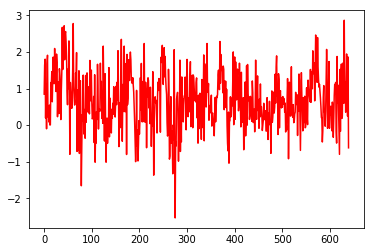

In [28]:
plt.plot(p-y, color = 'red')
plt.show()